In [2]:
custom_lib <- "/kaggle/input/library-data/my_r_libs"  # Your custom library path
default_lib <- .libPaths()[1]  # Default R library path

# List all packages in the custom library
packages <- list.dirs(custom_lib, full.names = TRUE, recursive = FALSE)

# Move packages from custom to default library path
for (pkg in packages) {
  pkg_name <- basename(pkg)  # Extract package name
  target_path <- file.path(default_lib, pkg_name)
  
  # Check if the package already exists in the default path
  if (!dir.exists(target_path)) {
    file.copy(pkg, default_lib, recursive = TRUE)
  } else {
    message(paste("Package already exists in default library:", pkg_name))
  }
}
print('-----------------All packages are moved----------------------')

Package already exists in default library: Rcpp

Package already exists in default library: RcppArmadillo



[1] "-----------------All packages are moved----------------------"


In [4]:
library(Seurat)
library(tidyverse)
set.seed(12345)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
object <- Load10X_Spatial(data.dir = "/kaggle/working/", bin.size = 8) # bin.size = C(2,8,16)


In [7]:
str(object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ Spatial.008um:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:79334533] 159 223 366 483 655 821 968 1017 1224 1234 ...
  .. .. .. .. .. .. ..@ p       : int [1:393544] 0 122 193 592 849 1031 1103 1318 1377 1695 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 19059 393543
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:79334533] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:393543, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. 

In [11]:
head(object@meta.data)


orig.ident nCount_Spatial.008um nFeature_Spatial.008um
s_008um_00301_00321-1 s          127                  122                   
s_008um_00602_00290-1 s           80                   71                   
s_008um_00515_00112-1 s          436                  399                   
s_008um_00383_00696-1 s          287                  257                   
s_008um_00526_00291-1 s          194                  182                   
s_008um_00681_00396-1 s           83                   72

In [12]:
Assays(object)

[1] "Spatial.008um"

Warning message:
“Default search for "data" layer in "Spatial.008um" assay yielded no results; utilizing "counts" layer instead.”


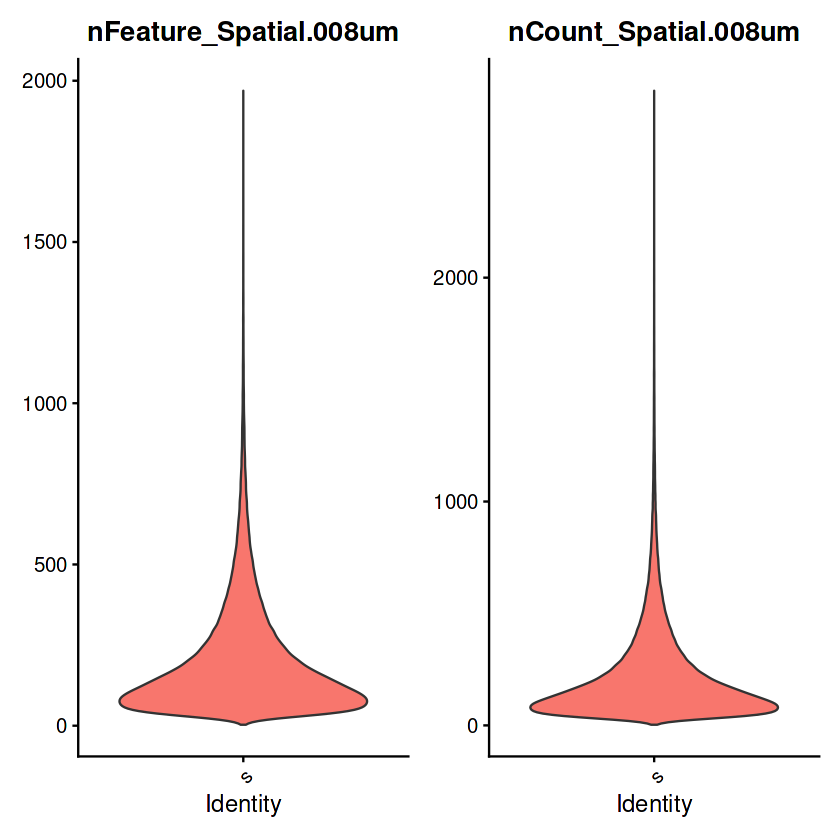

In [15]:
VlnPlot(object, features = c("nFeature_Spatial.008um", "nCount_Spatial.008um"), pt.size = 0, raster=FALSE)

In [21]:
# For the default assay
# rownames(seurat_object)

# For a specific assay, like "Spatial" (if applicable)
rownames(object[["Spatial"]])


ERROR: [1m[33mError[39m in `object[["spatial"]]`:[22m
[33m![39m ‘spatial’ not found in this Seurat object
 


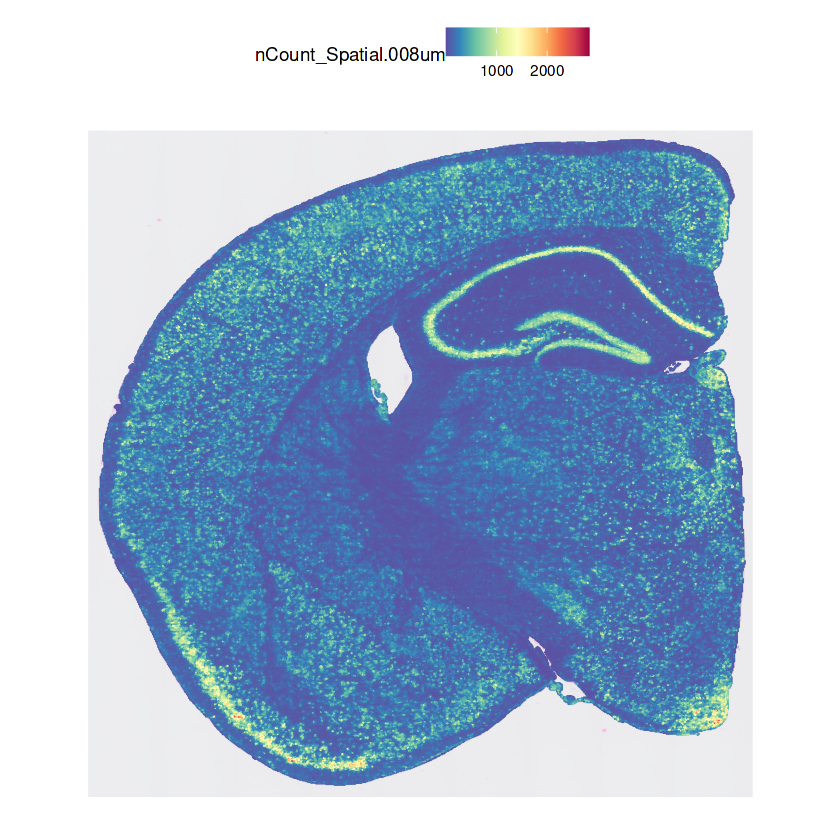

In [23]:
SpatialFeaturePlot(object, features = "nCount_Spatial.008um")


In [17]:
# Seurat workflow
object <- NormalizeData(object)
object <- FindVariableFeatures(object)
object <- ScaleData(object)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [24]:
# Select 50,000 cells and create a new 'sketch' assay
object <- SketchData(object, ncells = 50000, method = "LeverageScore", sketched.assay = "sketch")

Calcuating Leverage Score

Attempting to cast layer counts to dgCMatrix

Attempting to cast layer data to dgCMatrix



In [26]:
str(object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ Spatial.008um:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:79334533] 159 223 366 483 655 821 968 1017 1224 1234 ...
  .. .. .. .. .. .. ..@ p       : int [1:393544] 0 122 193 592 849 1031 1103 1318 1377 1695 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 19059 393543
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:79334533] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:79334533] 159 223 366 483 655 821 968 1017 1224 1234 ...
  .. .. .. .. .. .. ..@ p       : int [1:39

In [27]:
DefaultAssay(object) <- "sketch"

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Ptk2b, Nrgn, Snap25, Olfm1, Ncdn, Chn1, Slc17a7, Uchl1, Atp1b1, Gria2 
	   Nptxr, Ppp3ca, Ptprn, Ppp3r1, Cck, Enc1, Snhg11, Kalrn, Rnf112, Cadm3 
	   Cacng8, Atp2b1, Hpca, Rasgrp1, Nell2, Camk2n1, Camkv, Tmem181a, Camk2b, Akap5 
Negative:  Ptgds, Apod, Apoe, Igf2, Mbp, Plp1, Mgp, Atp1a2, Mobp, Ahnak 
	   Vim, Fn1, Igfbp2, Trf, Vtn, Rbp1, Timp3, Cldn11, Acta2, Pltp 
	   Gfap, Tm4sf1, Col1a2, Mal, Slc6a20a, Aebp1, Mt2, Sparc, Aldh1a2, Slc13a4 
PC_ 2 
Positive:  Igf2, Ptgds, Mgp, Igfbp2, Fn1, Ahnak, Vim, Rbp1, Aebp1, Slc6a20a 
	   Col1a2, Nnat, Apod, Timp3, Slc13a4, Acta2, Aldh1a2, Bmp6, Vtn, Nbl1 
	   Bmp7, Ogn, Tm4sf1, Slc22a8, Atp1a2, Isyna1, Tagln, Fmod, Anxa2, Pcolce 
Negative:  Mbp, Mobp, Plp1, Ugt8a, Mal, Mag, Pcp4, Gatm, Ermn, Trf 
	   Prkcd, Bcas1, Cnp, Tspan2, Car2, Sept4, Mog, Cldn11, Gjc3, Tnnt1 
	   Fa2h, Pvalb, Hapln2, Sox10, Camk2n1, Gpr37, Opalin, Ramp3, Cplx1, Rab37 
PC_ 3 
Po

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 50000
Number of edges: 2096088

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8973
Number of communities: 32
Elapsed time: 35 seconds


12 singletons identified. 20 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
UMAP will return its model

18:56:08 UMAP embedding parameters a = 0.9922 b = 1.112

18:56:08 Read 50000 rows and found 50 numeric columns

18:56:08 Using Annoy for neighbor search, n_neighbors = 30

18:56:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:56:22 Writing NN index file to temp file /tmp/RtmpqyMeo6/file215af5d9ab

18:56:22 Searching Annoy index using 1 thread, search_k = 3000

18:57:00 Annoy recall = 100%

18:57:01 Commencing 

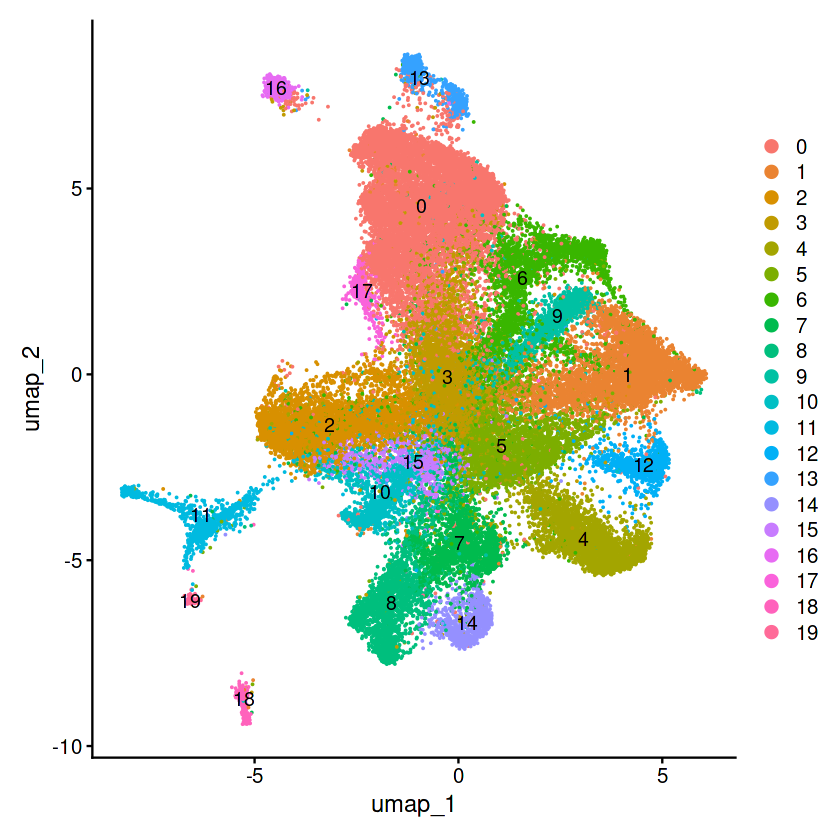

In [28]:
object <- FindVariableFeatures(object)
object <- ScaleData(object)
object <- RunPCA(object)
object <- FindNeighbors(object, dims = 1:50)
object <- FindClusters(object, resolution = 0.5)
object <- RunUMAP(object, return.model = T, dims = 1:50)


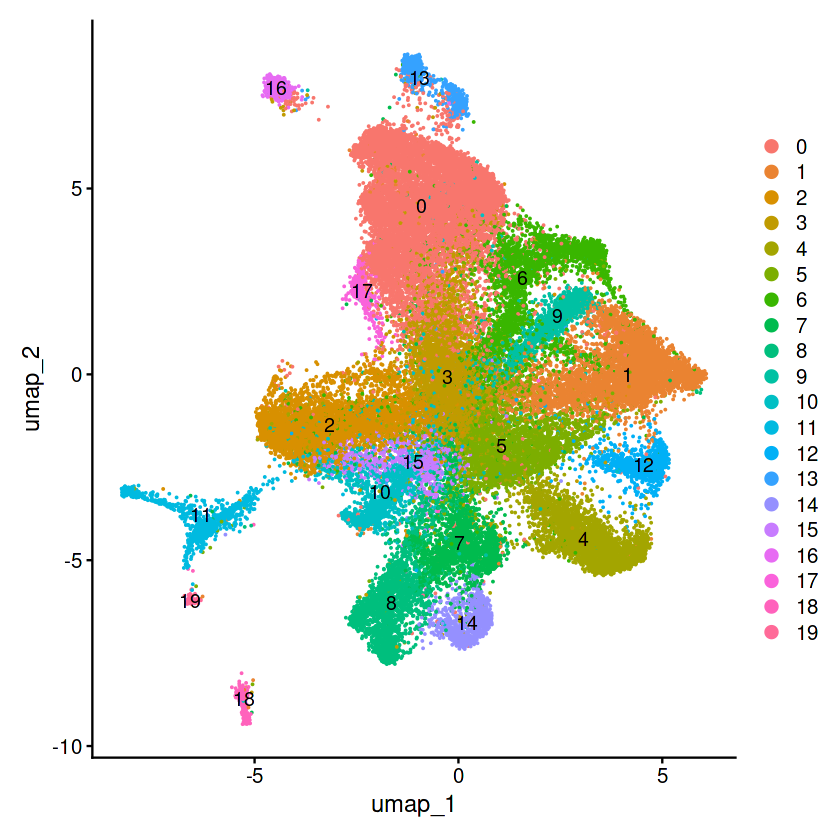

In [29]:
DimPlot(object, label = T)

In [31]:
head(object@meta.data)

orig.ident nCount_Spatial.008um nFeature_Spatial.008um
s_008um_00301_00321-1 s          127                  122                   
s_008um_00602_00290-1 s           80                   71                   
s_008um_00515_00112-1 s          436                  399                   
s_008um_00383_00696-1 s          287                  257                   
s_008um_00526_00291-1 s          194                  182                   
s_008um_00681_00396-1 s           83                   72                   
                      leverage.score sketch_snn_res.0.5 seurat_clusters
s_008um_00301_00321-1 0.10670099     NA                 NA             
s_008um_00602_00290-1 0.02754795     NA                 NA             
s_008um_00515_00112-1 0.16481433     NA                 NA             
s_008um_00383_00696-1 0.18658820     0                  0              
s_008um_00526_00291-1 0.08211462     NA                 NA             
s_008um_00681_00396-1 0.02814043     NA                 NA

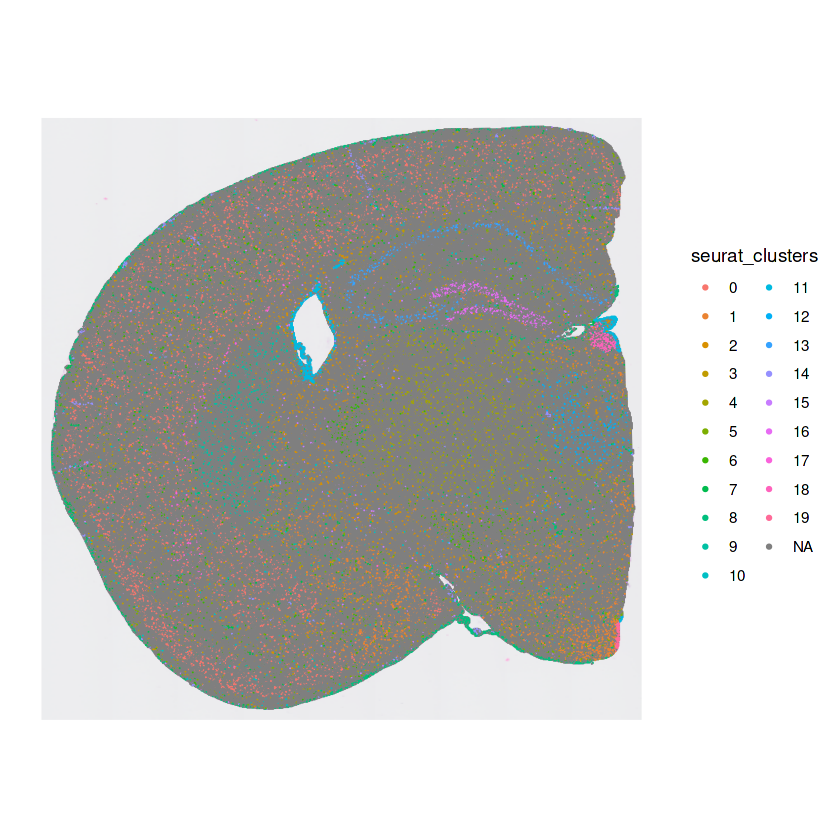

In [36]:
SpatialDimPlot(object, group.by = "seurat_clusters")


In [37]:
object <- ProjectData(object, assay = "Spatial.008um", full.reduction = "full.pca",
                      sketched.assay = "sketch", sketched.reduction = "pca",
                      umap.model = "umap", dims = 1:50,
                      refdata = list(seurat_clusters.full = "seurat_clusters"))


full.pca is not in the object. Data from all cells will be projected to pca

Projecting cell embeddings

Finding sketch neighbors

Finding sketch weight matrix

Transfering refdata from sketch

Projection to sketch umap

Running UMAP projection

19:14:07 Read 393543 rows

19:14:07 Processing block 1 of 1

19:14:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:14:13 Initializing by weighted average of neighbor coordinates using 1 thread

19:14:18 Commencing optimization for 67 epochs, with 11800023 positive edges

19:15:17 Finished

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from full.umap to fullumap_”


In [38]:
# visualize the full clusters based on their spatial location
DefaultAssay(object) <- "Spatial.008um"

In [41]:
head(object@meta.data)

orig.ident nCount_Spatial.008um nFeature_Spatial.008um
s_008um_00301_00321-1 s          127                  122                   
s_008um_00602_00290-1 s           80                   71                   
s_008um_00515_00112-1 s          436                  399                   
s_008um_00383_00696-1 s          287                  257                   
s_008um_00526_00291-1 s          194                  182                   
s_008um_00681_00396-1 s           83                   72                   
                      leverage.score sketch_snn_res.0.5 seurat_clusters
s_008um_00301_00321-1 0.10670099     NA                 NA             
s_008um_00602_00290-1 0.02754795     NA                 NA             
s_008um_00515_00112-1 0.16481433     NA                 NA             
s_008um_00383_00696-1 0.18658820     0                  0              
s_008um_00526_00291-1 0.08211462     NA                 NA             
s_008um_00681_00396-1 0.02814043     NA                 NA             
                      seurat_clusters.full seurat_clusters.full.score
s_008um_00301_00321-1 4                    1.0000000                 
s_008um_00602_00290-1 10                   0.5865775                 
s_008um_00515_00112-1 1                    1.0000000                 
s_008um_00383_00696-1 0                    0.6761817                 
s_008um_00526_00291-1 1                    0.3228747                 
s_008um_00681_00396-1 3                    0.9071991

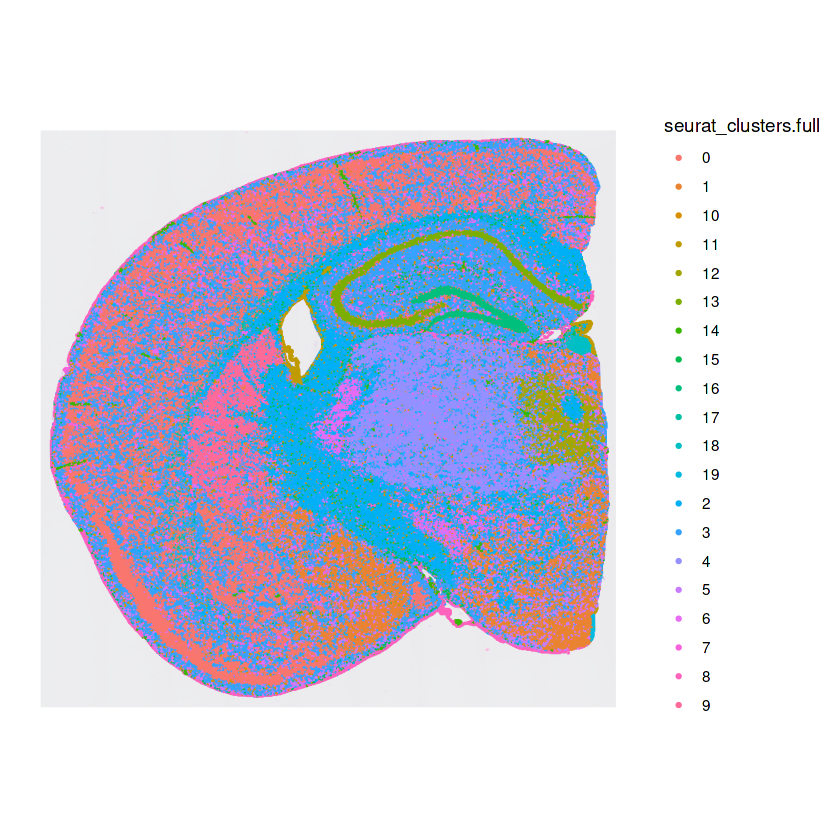

In [42]:
SpatialDimPlot(object, group.by = "seurat_clusters.full")


In [45]:
Idents(object) <- object@meta.data$seurat_clusters.full


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



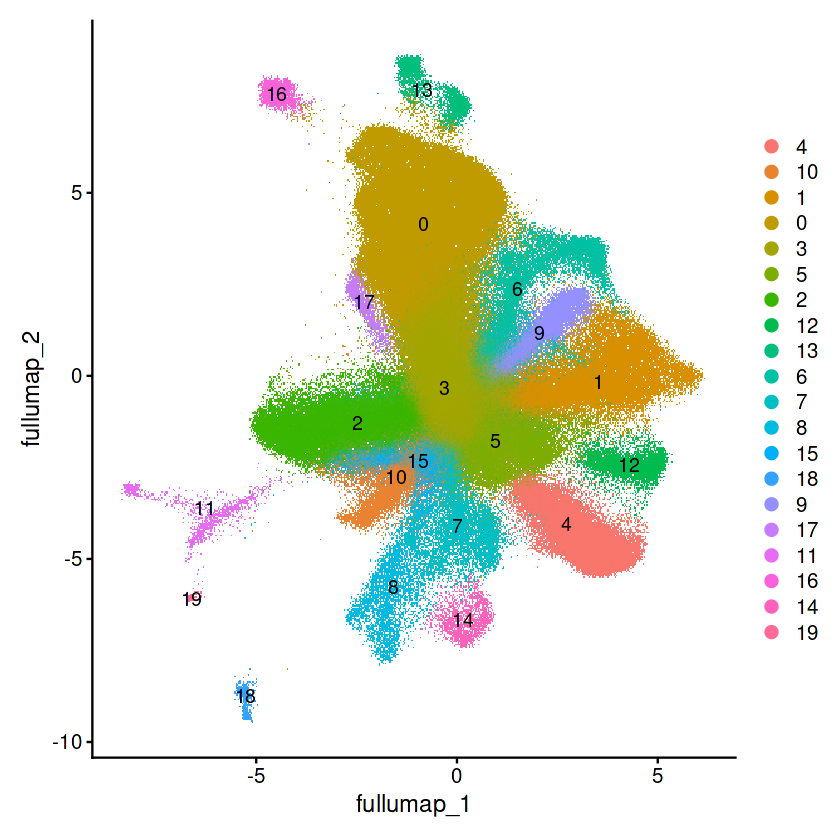

In [46]:
DimPlot(object, label = T)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


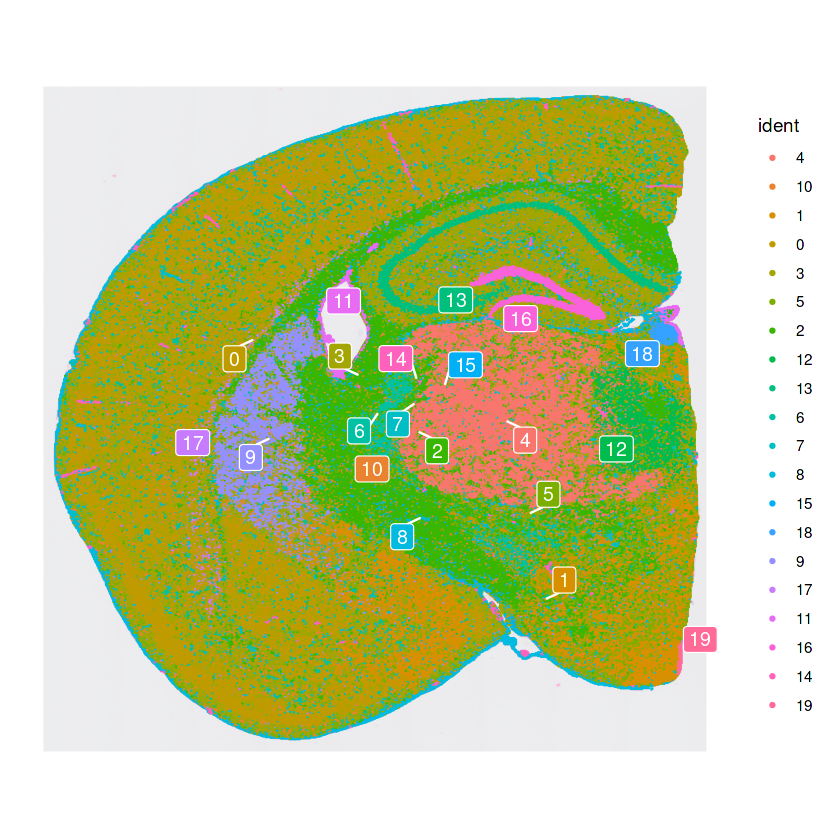

In [47]:
SpatialDimPlot(object, label = T, repel = T, label.size = 4)


In [48]:
cells <- CellsByIdentities(object, idents = c(7, 13, 16))


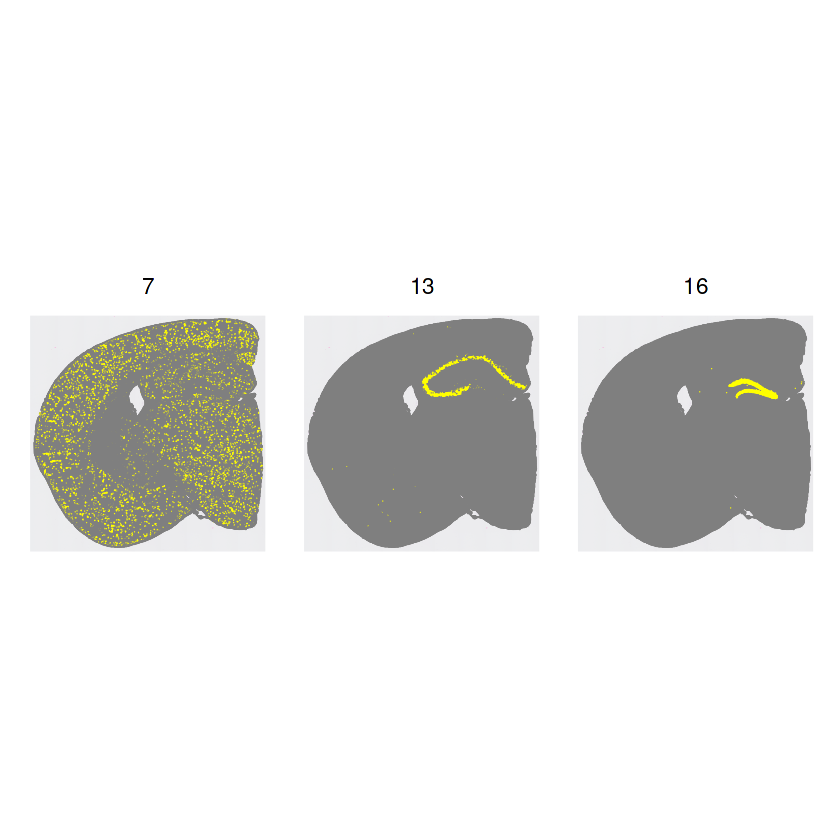

In [49]:
SpatialDimPlot(object, cells.highlight = cells[setdiff(names(cells), "NA")],
               cols.highlight = c("#FFFF00", "grey50"), 
               facet.highlight = T, combine = T)

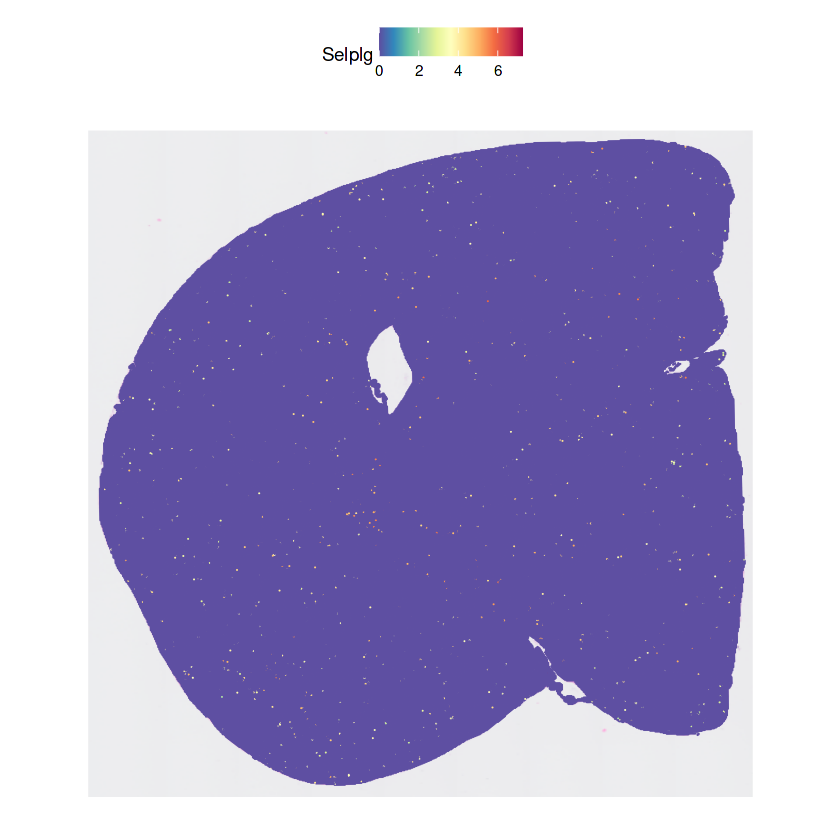

In [51]:
SpatialFeaturePlot(object, features = "Selplg")

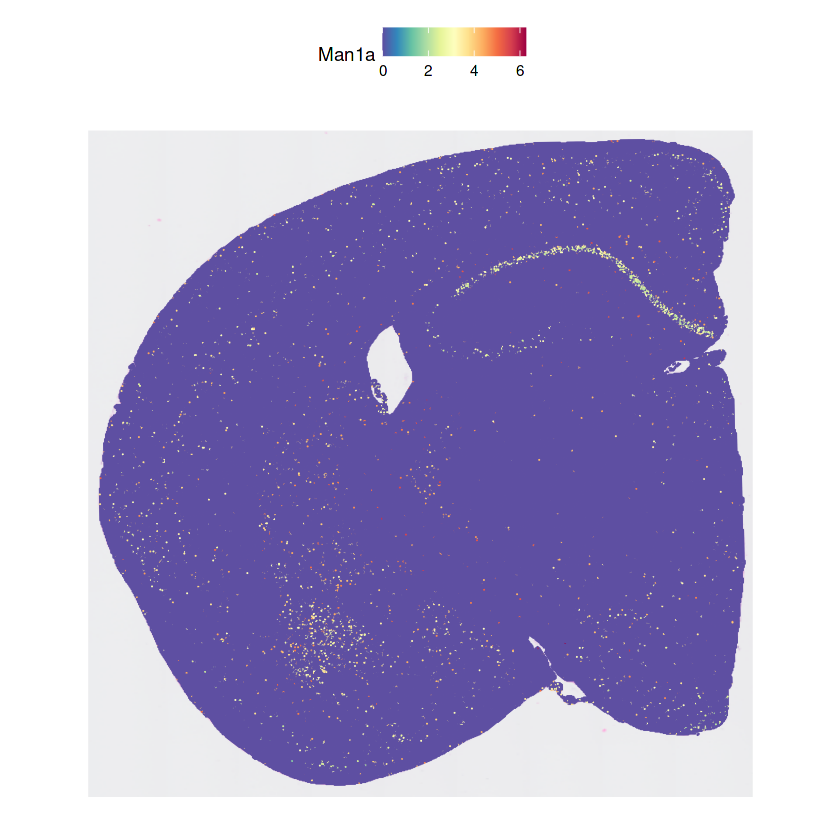

In [52]:

SpatialFeaturePlot(object, features = "Man1a")

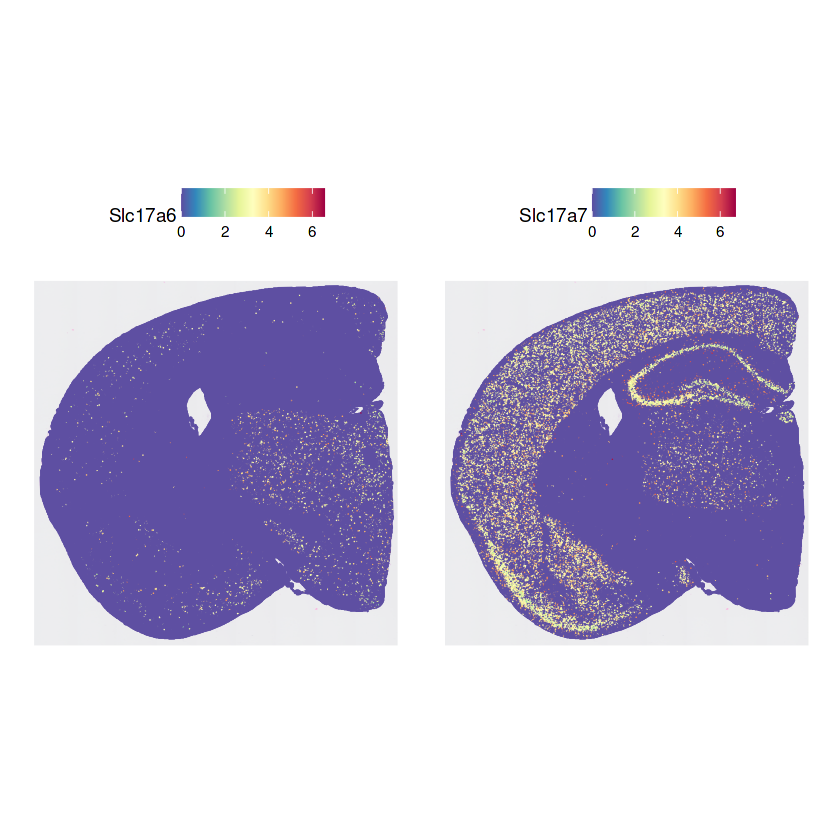

In [64]:
SpatialFeaturePlot(object, features = c("Slc17a6", "Gad1"), ncol = 2)
